In [1]:
# importing "random" for random operations
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#a is the probability of getting 1; p(b=1)=a and p(b=0)=1-a
#throw the coin N times
#the function coin_toss is used for calculating A and KA
def coin_toss(N,a):
  y=[None]*N
  for i in range(1,(N+1)):
    b=random.random()#produce a random number btw 0 and 1
    if b<(1-a):
      y[i-1]=0
    else:
      y[i-1]=1
  return y

N=1000000
a=float(input("please enter a decimal between 0 and 1 for the p(bi=1) for A:"))
print("For A, p(bi=1)=",a)
#a_values=np.arange(0,1,0.1)
av=np.array([0.2])
av=np.append(av,a)
av

please enter a decimal between 0 and 1 for the p(bi=1) for A:0.8
For A, p(bi=1)= 0.8


array([0.2, 0.8])

In [3]:
#random.choices() method in Python
#returns multiple random elements from the list with replacement. You can weigh the possibility of each result with the weights parameter 
def toss_coin(N,a):
  mylist=[0,1]#possible values of coin toss
  return (random.choices(mylist, weights = [1-a,a], k = N))

# print(sum(toss_coin(1000,0.2)))

In [4]:
#p(b'=b)=p and p(b'=1-b)=1-p
def mut(p,b):
  x=random.random()
  if x<1-p:#the bit does not change
    return 1-b
  else:#the bit flips
    return b

# print(mut(1,0))
def s_mutation(S,p):
  y=S[:]
  N=len(S)
  for i in range(1,(1+N)):
    x=mut(p,y[i-1])
    y[i-1]=x
  return y

In [ ]:
# def mutation(p,b):
#   mylist=[1-b,b]
#   return (random.choices(mylist, weights = [1-p,p], k = 1))#it returns a list

# # print(mutation(0,0))
# def mutations(S,p):
#   y=S[:]#make a copy of S
#   N=len(S)
#   for i in range(0,N):
#     x=mutation(p,y[i])
#     y[i]=x
#   return y

# print(mutations([1,1,0],0))

[[0], [0], [1]]


In [5]:
#n is the number of data points you want

def data_gen(n,N,a):
  KA=coin_toss(N,0.5)#Alice's encryption key
  KAa=np.array(KA)

  dt=(0.6-0.4)/(n-1)#instead of 0-1, do 0.4-0.6
  Ps=[None]*n
  for i in range(1,(n+1)):
    Ps[i-1]=0.4+(i-1)*dt
  Pss=np.array(Ps)#transforming a list into array
  not_half=Pss!=0.5#eliminate 0.5
  Pv=Pss[not_half]#mask indexing

  iter=len(Pv)
  As=np.zeros(iter)
  Bs=np.zeros(iter)
  Aesti=np.zeros(iter)
  
  for i in range(1,(iter+1)):
    A=coin_toss(N,a)#Alice's bit string
    Aa=np.array(A)
    KB=s_mutation(KA,Pv[i-1])
    KBb=np.array(KB)
    B=Aa ^ KAa ^ KBb#information that is given to Bob
    As[i-1]=sum(Aa)
    Bs[i-1]=sum(B)
    Aesti[i-1]=(Bs[i-1]-N*(1-Pv[i-1]))/(2*Pv[i-1]-1)
  return Pv,As,Bs,Aesti

def accuracy_calculation(Aesti,As):
  dev=abs(Aesti-As)#difference between As and Aesti
  acc=1-dev/(0.01*N)#accuracy rate
  return acc

n= 20


No handles with labels found to put in legend.


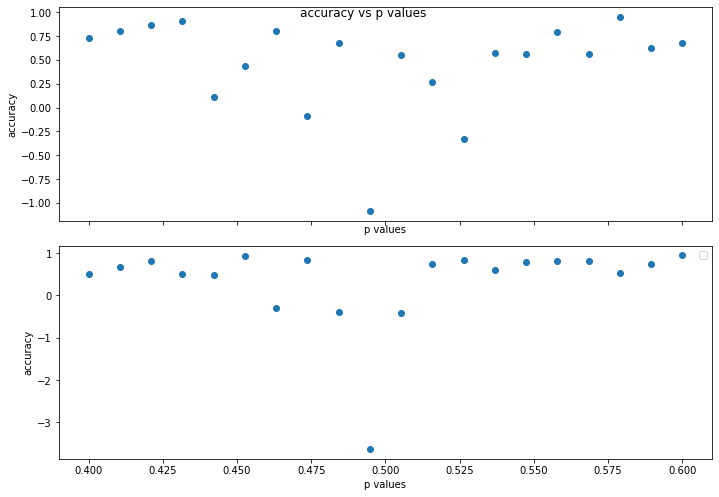

In [6]:
#n=int(input("please enter an integer(n), which is how many points you want"))
n=20
print("n=",n)

an=len(av)
fig, axs = plt.subplots(an, 1, figsize =(10, 7),sharex=True,tight_layout = True)
for i in range(1,(an+1)):
  Pv,As,Bs,Aesti=data_gen(n,N,av[i-1])
  acc=accuracy_calculation(Aesti,As)
  axs[i-1].scatter(Pv,acc)#plot the points
  axs[i-1].set_ylabel("accuracy")
  axs[i-1].set_xlabel("p values")
fig.suptitle("accuracy vs p values") 
# print("p values:",Pv)
# print("sum(A) vector:",As)
# #print("sum(B) vector:",Bs)
# print("estimated sum(A):",Aesti)

# dev=abs(Aesti-As)#difference between As and Aesti
# acc=1-dev/As#accuracy rate
# acc=accuracy_calculation(Aesti,As)
# plt.plot(Pv,acc,color='r',label=a)#plot the points
# plt.xlabel("p values")
# plt.ylabel("accuracy")
# plt.title("accuracy vs p values")
plt.legend()#Adding legend, which helps us recognize the curve according to it's color
plt.show()
